In [28]:
%cd /content
!rm -rf EVA-4
!git clone https://github.com/seepala98/EVA-4.git
!cd EVA-4/PHASE_1/S10/

/content
Cloning into 'EVA-4'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 617 (delta 122), reused 0 (delta 0), pack-reused 388
Receiving objects: 100% (617/617), 4.53 MiB | 27.75 MiB/s, done.
Resolving deltas: 100% (278/278), done.


In [29]:
%cd EVA-4/PHASE_1/S10/

/content/EVA-4/PHASE_1/S10


In [30]:
%ls

display.py  load_transform.py  plot.py    Transform_utils/
gradcam.py  lr_finder.py       README.md  validation.py
images/     Models/            train.py


# Import Library

In [31]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
!pip install albumentations

In [32]:
from Transform_utils import *
from Transform_utils.transform_albumentation import Data
data = Data()

trainset = data.getTrainDataSet(train=True)
testset =  data.getTestDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
testloader1 = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



plane   dog  deer  deer


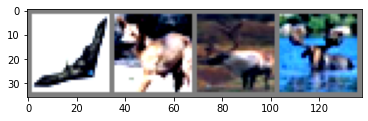

In [33]:
import display
# get some random training images
dataiter = iter(trainloader1)
#dataiter = iter(load_transform.trainloader_for_plot)
images, labels = dataiter.next()

# show images
display.imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

In [0]:
from Models import resnet

In [35]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14      

# Loss Function and optimization

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


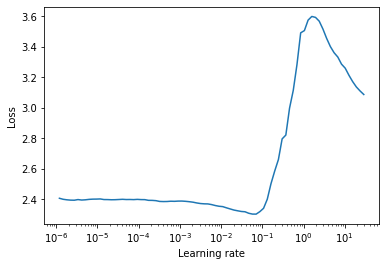

In [36]:
import torch.nn as nn
import torch.optim as optim
from display import lr_finder
#from torch.optim.lr_scheduler import StepLR
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder(net, optimizer, criterion, trainloader)
#optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.95, weight_decay=0.0001)
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# train and test

In [0]:
import train 
import validation
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
net = resnet.ResNet18().to(device)
optimizer = optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, weight_decay=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

test_acc = []
train_acc = []
trainloss_ = []
testloss_ = []
loss=1000
loss1 = 1000

In [38]:
losses = []
accuracies = []

epochs = 50
for epoch in range(1, epochs + 1):
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    print(f'Epoch {epoch}:')
    trainacc, loss = train.train(net, trainloader, device, optimizer, criterion)
    train_acc.append(trainacc)
    testacc, loss1 = validation.val(net, testloader, device, criterion, losses, accuracies)
    test_acc.append(testacc)
    trainloss_.append(loss)
    testloss_.append(loss1)
    scheduler.step(loss1)
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1
Epoch 1:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0127, Accuracy: 3995/10000 (39.95%)

lr=  0.1
Epoch 2:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0104, Accuracy: 5203/10000 (52.03%)

lr=  0.1
Epoch 3:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0092, Accuracy: 5865/10000 (58.65%)

lr=  0.1
Epoch 4:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 6373/10000 (63.73%)

lr=  0.1
Epoch 5:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0071, Accuracy: 6867/10000 (68.67%)

lr=  0.1
Epoch 6:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 7076/10000 (70.76%)

lr=  0.1
Epoch 7:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0056, Accuracy: 7551/10000 (75.51%)

lr=  0.1
Epoch 8:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0052, Accuracy: 7722/10000 (77.22%)

lr=  0.1
Epoch 9:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0049, Accuracy: 7847/10000 (78.47%)

lr=  0.1
Epoch 10:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 8110/10000 (81.10%)

lr=  0.1
Epoch 11:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8130/10000 (81.30%)

lr=  0.1
Epoch 12:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 8114/10000 (81.14%)

lr=  0.1
Epoch 13:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0043, Accuracy: 8188/10000 (81.88%)

lr=  0.1
Epoch 14:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 8205/10000 (82.05%)

lr=  0.1
Epoch 15:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0043, Accuracy: 8302/10000 (83.02%)

lr=  0.1
Epoch 16:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8425/10000 (84.25%)

lr=  0.1
Epoch 17:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0050, Accuracy: 8243/10000 (82.43%)

lr=  0.1
Epoch 18:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8305/10000 (83.05%)

lr=  0.1
Epoch 19:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 8264/10000 (82.64%)

lr=  0.1
Epoch 20:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8373/10000 (83.73%)

lr=  0.05
Epoch 21:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8632/10000 (86.32%)

lr=  0.05
Epoch 22:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0042, Accuracy: 8642/10000 (86.42%)

lr=  0.05
Epoch 23:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8631/10000 (86.31%)

lr=  0.05
Epoch 24:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 8641/10000 (86.41%)

lr=  0.05
Epoch 25:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 8630/10000 (86.30%)

lr=  0.025
Epoch 26:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0042, Accuracy: 8737/10000 (87.37%)

lr=  0.025
Epoch 27:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0042, Accuracy: 8708/10000 (87.08%)

lr=  0.025
Epoch 28:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0042, Accuracy: 8769/10000 (87.69%)

lr=  0.025
Epoch 29:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8772/10000 (87.72%)

lr=  0.0125
Epoch 30:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8783/10000 (87.83%)

lr=  0.0125
Epoch 31:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0043, Accuracy: 8801/10000 (88.01%)

lr=  0.0125
Epoch 32:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0043, Accuracy: 8783/10000 (87.83%)

lr=  0.0125
Epoch 33:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0042, Accuracy: 8806/10000 (88.06%)

lr=  0.00625
Epoch 34:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8804/10000 (88.04%)

lr=  0.00625
Epoch 35:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8796/10000 (87.96%)

lr=  0.00625
Epoch 36:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8804/10000 (88.04%)

lr=  0.00625
Epoch 37:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8806/10000 (88.06%)

lr=  0.003125
Epoch 38:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8821/10000 (88.21%)

lr=  0.003125
Epoch 39:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8811/10000 (88.11%)

lr=  0.003125
Epoch 40:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8809/10000 (88.09%)

lr=  0.003125
Epoch 41:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8803/10000 (88.03%)

lr=  0.0015625
Epoch 42:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8814/10000 (88.14%)

lr=  0.0015625
Epoch 43:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8806/10000 (88.06%)

lr=  0.0015625
Epoch 44:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8798/10000 (87.98%)

lr=  0.0015625
Epoch 45:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8797/10000 (87.97%)

lr=  0.00078125
Epoch 46:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8811/10000 (88.11%)

lr=  0.00078125
Epoch 47:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8809/10000 (88.09%)

lr=  0.00078125
Epoch 48:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8808/10000 (88.08%)

lr=  0.00078125
Epoch 49:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8803/10000 (88.03%)

lr=  0.000390625
Epoch 50:


Loss=0.00 Batch ID=390 Accuracy=99.95: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]



Validation set: Average loss: 0.0040, Accuracy: 8797/10000 (87.97%)

Finished Training


# Plot Result

In [0]:
%matplotlib inline
import plot

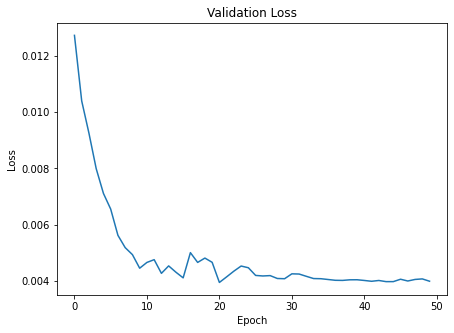

In [40]:
plot.plot_metric(losses, 'Loss')

# Plot Accuracy

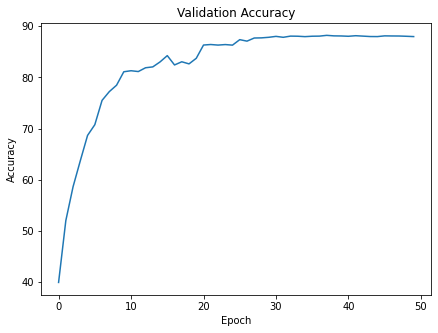

In [41]:
plot.plot_metric(accuracies, 'Accuracy')

GroundTruth:  truck  deer  ship  deer


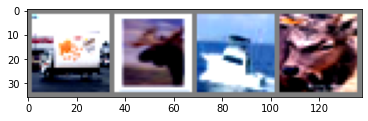

In [42]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

display.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images.cuda())

In [44]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  truck  bird  ship  deer


# Result Analysis


In [45]:
from display import OverallAcc
OverallAcc(testloader1,net)

Accuracy of plane : 90 %
Accuracy of   car : 95 %
Accuracy of  bird : 83 %
Accuracy of   cat : 73 %
Accuracy of  deer : 86 %
Accuracy of   dog : 80 %
Accuracy of  frog : 93 %
Accuracy of horse : 89 %
Accuracy of  ship : 94 %
Accuracy of truck : 92 %


In [46]:
# get the image from the dataloader
testset =  data.getTrainDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)
it = iter(testloader2)

Files already downloaded and verified


In [0]:
test_grad_loader = data.getDataLoader(testset,1)
import gradcam
it = iter(test_grad_loader)

/content/EVA-4/PHASE_1/S10/gradcam.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=3)


<Figure size 1008x1152 with 0 Axes>

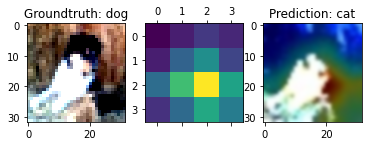

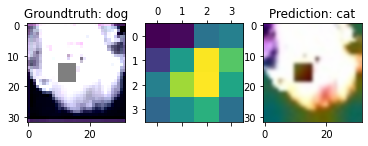

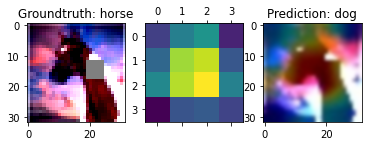

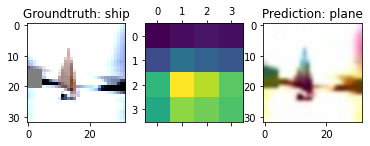

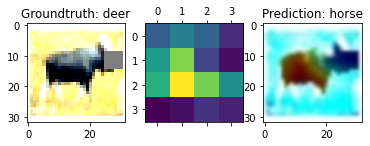

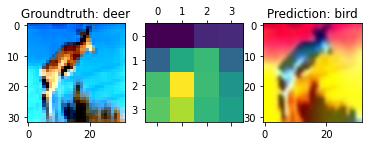

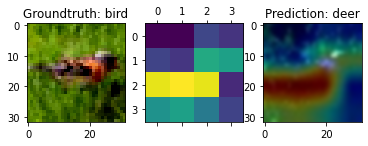

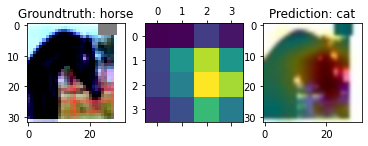

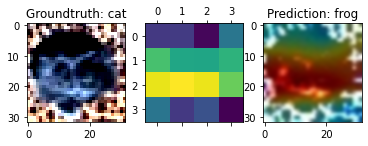

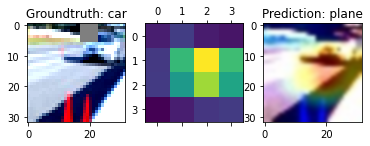

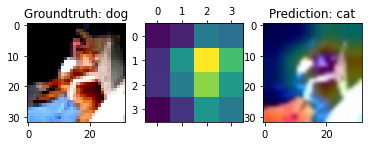

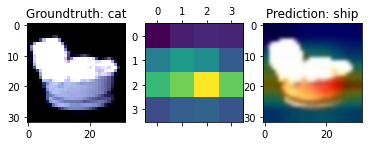

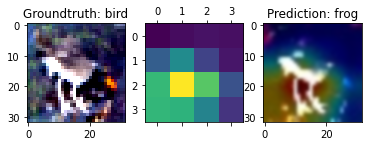

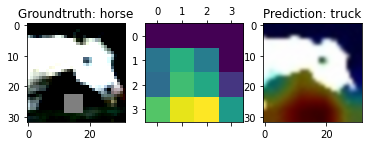

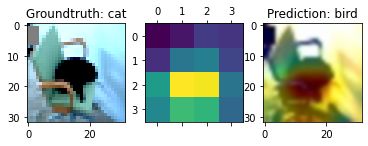

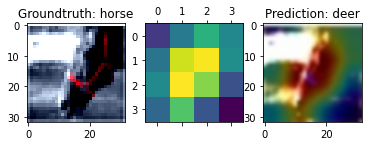

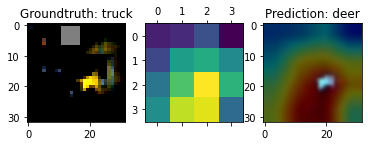

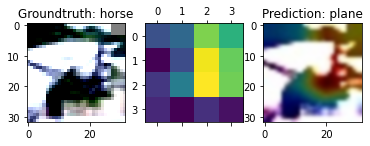

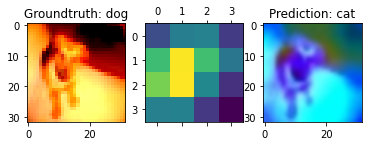

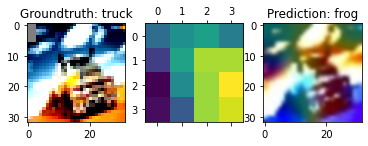

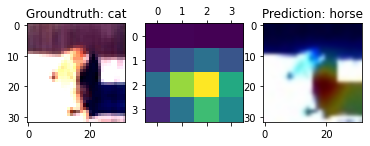

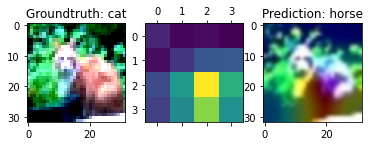

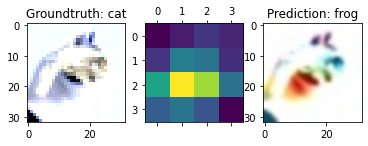

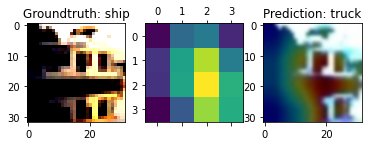

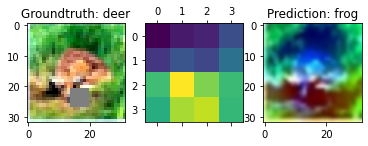

In [49]:
fig=plt.figure(figsize=(14, 16))
#count = 0

import gradcam
count = 0
while(count != 25):
    images, labels = it.next()
    output = net(images.cuda())
    pred = output.argmax(dim=1, keepdim=True)
    if(classes[pred] != classes[labels]):
      gradcam.gradcamof(net, images, classes, str(classes[labels]), str(classes[pred]))
      count=count+1


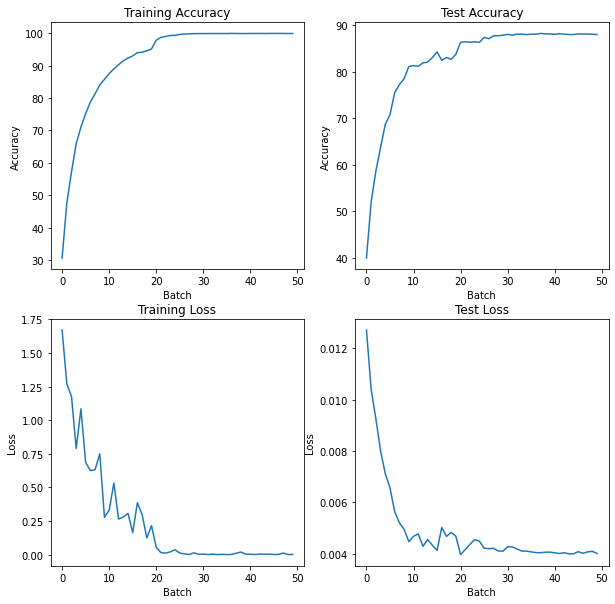

In [50]:
from display import plot_acc_loss

plot_acc_loss(train_acc,test_acc,trainloss_,testloss_)